In [850]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [851]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train['SalePrice'] = np.log1p(train['SalePrice'])
combine = pd.concat([train,test])

/Users/rushikesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [852]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [853]:
train.shape,test.shape,combine.shape

((1460, 81), (1459, 80), (2919, 81))

### Lets Drop SalePrice Column from combine dataset

In [854]:
combine.drop('SalePrice',axis=1,inplace=True)

In [855]:
(combine.isnull().sum().sort_values(ascending=False)/combine.shape[0]).head(35)

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageQual      0.054471
GarageFinish    0.054471
GarageYrBlt     0.054471
GarageCond      0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Utilities       0.000685
Functional      0.000685
Electrical      0.000343
Exterior2nd     0.000343
KitchenQual     0.000343
Exterior1st     0.000343
GarageCars      0.000343
TotalBsmtSF     0.000343
GarageArea      0.000343
BsmtUnfSF       0.000343
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
SaleType        0.000343
Condition2      0.000000
dtype: float64

In [856]:
combine['PoolQC'] = combine['PoolQC'].notnull().astype(int)

In [857]:
combine['MiscFeature'] = combine['MiscFeature'].notnull().astype(int)

In [858]:
combine['Alley'] = combine['Alley'].notnull().astype(int)

In [859]:
combine['Fence'] = combine['Fence'].notnull().astype(int)

In [860]:
combine['FireplaceQu'] = combine['FireplaceQu'].notnull().astype(int)
combine.drop('Fireplaces',axis=1,inplace=True)

In [861]:
(combine.isnull().sum().sort_values(ascending=False)).head(35)

LotFrontage     486
GarageQual      159
GarageYrBlt     159
GarageCond      159
GarageFinish    159
GarageType      157
BsmtCond         82
BsmtExposure     82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrType       24
MasVnrArea       23
MSZoning          4
BsmtHalfBath      2
Functional        2
BsmtFullBath      2
Utilities         2
BsmtFinSF2        1
BsmtUnfSF         1
BsmtFinSF1        1
SaleType          1
GarageArea        1
GarageCars        1
TotalBsmtSF       1
Electrical        1
KitchenQual       1
Exterior1st       1
Exterior2nd       1
Fence             0
FullBath          0
Foundation        0
FireplaceQu       0
YrSold            0
ExterQual         0
dtype: int64

In [862]:
combine['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

### We would fillna of lotFrontage with mean values

In [863]:
combine['LotFrontage'] = combine['LotFrontage'].fillna(np.mean(combine['LotFrontage']))

In [864]:
corr = train.corr()
corr[['SalePrice']].sort_values(by='SalePrice',ascending=False).style.background_gradient()

,SalePrice
SalePrice,1
OverallQual,0.817185
GrLivArea,0.700927
GarageCars,0.680625
GarageArea,0.650888
TotalBsmtSF,0.612134
1stFlrSF,0.596981
FullBath,0.594771
YearBuilt,0.58657
YearRemodAdd,0.565608


### This features contribute to same features,so I would be taking only one which has high corr i.e  GarageCars
#### Moreover i think this are all the same observation having null values
GarageYrBlt     159
GarageFinish    159
GarageCond      159
GarageQual      159
GarageType      157

In [865]:
for col in (['GarageYrBlt','GarageFinish','GarageCond','GarageQual','GarageType']):
    combine.drop(col,axis=1,inplace=True)

### garage cars and garage area again are one and same thing

In [866]:
combine.drop('GarageCars',axis=1,inplace=True)

In [867]:
(combine.isnull().sum().sort_values(ascending=False)).head(35)

BsmtCond         82
BsmtExposure     82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrType       24
MasVnrArea       23
MSZoning          4
Functional        2
Utilities         2
BsmtHalfBath      2
BsmtFullBath      2
Electrical        1
Exterior2nd       1
BsmtUnfSF         1
Exterior1st       1
BsmtFinSF2        1
BsmtFinSF1        1
SaleType          1
KitchenQual       1
TotalBsmtSF       1
GarageArea        1
ExterQual         0
FireplaceQu       0
Fence             0
Foundation        0
FullBath          0
YrSold            0
CentralAir        0
ExterCond         0
EnclosedPorch     0
Condition2        0
Condition1        0
HalfBath          0
BldgType          0
dtype: int64

In [868]:
for col in (['BsmtCond','BsmtExposure','BsmtQual','BsmtFinType2','BsmtFinType1']):
    combine.drop(col,axis=1,inplace=True)

In [869]:
(combine.isnull().sum().sort_values(ascending=False)).head(15)

MasVnrType      24
MasVnrArea      23
MSZoning         4
BsmtFullBath     2
Functional       2
Utilities        2
BsmtHalfBath     2
KitchenQual      1
GarageArea       1
Exterior2nd      1
Exterior1st      1
BsmtUnfSF        1
Electrical       1
BsmtFinSF2       1
TotalBsmtSF      1
dtype: int64

In [870]:
combine.drop('MasVnrType',axis=1,inplace=True)

In [871]:
combine['MasVnrArea'] = combine['MasVnrArea'].fillna(np.mean(combine['MasVnrArea']))

In [872]:
(combine.shape[0]-(combine.dropna()).shape[0])/combine.shape[0]

0.004453579993148339

In [873]:
#we can drop these observations
combine.dropna(subset=[],inplace=True)

In [874]:
combine.isnull().sum().head(5)

1stFlrSF        0
2ndFlrSF        0
3SsnPorch       0
Alley           0
BedroomAbvGr    0
dtype: int64

### we could add total area as a feature

In [875]:
combine['TotalArea'] = combine['TotalBsmtSF'] + combine['1stFlrSF'] +  combine['2ndFlrSF']

In [876]:
combine.skew().sort_values(ascending=False)

MiscVal          21.958480
PoolQC           17.005900
PoolArea         16.907017
LotArea          12.829025
LowQualFinSF     12.094977
3SsnPorch        11.381914
MiscFeature       4.986267
KitchenAbvGr      4.304467
BsmtFinSF2        4.147456
EnclosedPorch     4.005950
ScreenPorch       3.948723
BsmtHalfBath      3.932018
Alley             3.439091
MasVnrArea        2.612892
OpenPorchSF       2.536417
WoodDeckSF        1.843380
LotFrontage       1.646420
Fence             1.535478
TotalArea         1.516129
1stFlrSF          1.470360
BsmtFinSF1        1.425722
MSSubClass        1.376165
GrLivArea         1.270010
TotalBsmtSF       1.162882
BsmtUnfSF         0.919824
2ndFlrSF          0.862118
TotRmsAbvGrd      0.758757
HalfBath          0.694924
BsmtFullBath      0.624062
OverallCond       0.570605
BedroomAbvGr      0.326492
GarageArea        0.241301
OverallQual       0.197212
MoSold            0.195985
FullBath          0.167692
YrSold            0.132467
Id                0.000000
F

In [877]:
data = pd.get_dummies(combine)

In [917]:
traindata = data[0:1200]
valdata=data[1200:1460]
testdata = data [1460:-1]

In [918]:
def cost(x,y,theta):
    return np.sum(np.power(x*theta.T-y,2))/(2*x.shape[0])

In [919]:
def gradDescent(x,y,theta,iterations,alpha):
    costf=[]
    m=x.shape[0]
    for i in range(iterations):
        error = x*theta.T-y
        temp = error*alpha/m
        theta = theta- temp.T*x
        costf.append(cost(x,y,theta))
        
    return costf,theta

In [920]:
x1 = (traindata - np.mean(traindata)/np.std(traindata))
x2 = (valdata - np.mean(valdata)/np.std(valdata))

In [921]:
corr = pd.concat([traindata,train.SalePrice],sort=False,axis=1,join='inner').corr()
cols=corr[corr['SalePrice']>0.5].sort_values(by='SalePrice',ascending=False)['SalePrice'].index[1:]

In [922]:
y = pd.concat([traindata,train.SalePrice],sort=False,axis=1,join='inner').SalePrice
y = np.matrix((y).astype('float64')).T
x=x1
for col in x.columns.values:
    if col not in cols.values:
        x.drop(col,axis=1,inplace=True)
ones  = pd.Series(np.ones(x1.shape[0]))
x.insert(0,'ones',value=ones)
x = np.matrix(x).astype('float64')
theta = np.matrix(np.zeros(x.shape[1])).astype('float64')
m=x.shape[0]
alpha=0.0000000005
iterations=1000

In [923]:
x.shape,y.shape,theta.shape


((1200, 14), (1200, 1), (1, 14))

In [924]:
cost(x,y,theta)

72.38007958591884

In [925]:
costf,theta=gradDescent(x,y,theta,iterations,alpha)

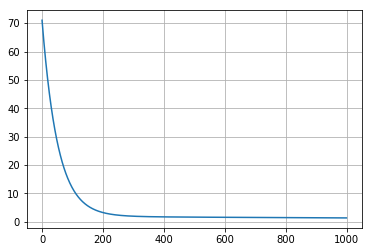

In [926]:
plt.plot(range(iterations),costf)
plt.grid(True)
plt.show()

In [927]:
costf[-1]

1.3065944066832698

In [928]:
valy = pd.concat([valdata,train.SalePrice],sort=False,axis=1,join='inner').SalePrice
valy = np.matrix((valy).astype('float64')).T
valx= x2
for col in valx.columns.values:
    if col not in cols.values:
        valx.drop(col,axis=1,inplace=True)
valx.insert(0,'Ones',1)

In [929]:
predicted=(np.matrix(valx)*theta.T)
predicted = np.matrix((predicted).astype('float64'))


In [930]:
predicted.shape,valy.shape

((260, 1), (260, 1))

In [931]:
t=predicted-valy
np.sqrt(np.divide(np.sum(np.multiply(t,t)),predicted.shape[0]))

2.0245909251703718

In [932]:
x3 = (testdata - np.mean(testdata)/np.std(testdata))
testx=x3
for col in testx.columns.values:
    if col not in cols.values:
        testx.drop(col,axis=1,inplace=True)
testx.insert(0,'Ones',1)

In [933]:
answer=(np.matrix(testx)*theta.T)
answer = np.matrix((answer).astype('float64'))

In [934]:
x3['SalePrice'] = answer

In [935]:
final=np.exp(x3[['SalePrice']])

In [936]:
final.index = range(1461,2919)

In [937]:
final.to_csv('output.csv')

In [938]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

### forestOutput using Correlation
### commet below if now using


In [972]:
for col in data.columns.values:
    if col not in cols.values:
        data.drop(col,axis=1,inplace=True)

In [966]:
y=pd.concat([data[0:1460],train.SalePrice],sort=False,axis=1,join='inner').SalePrice
train_X, valid_X, train_y, valid_y = train_test_split(data[0:1460], y, random_state=1)

In [967]:
train_model = RandomForestRegressor()
train_model.fit(train_X, train_y)

val_pred = train_model.predict(valid_X)

rmse = np.sqrt(mean_squared_error(valid_y, val_pred))
rmse

/Users/rushikesh/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.16918212570736624

In [973]:
testdata = data [1460:-1]
for col in testdata.columns.values:
    if col not in cols.values:
        testdata.drop(col,axis=1,inplace=True)

In [974]:

testdata.fillna(0,inplace=True)

/Users/rushikesh/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [975]:
outputdp = pd.DataFrame(data=final_pred,index=range(1461,2919),columns=['SalePrice'])

In [976]:
outputdp.to_csv('forestoutput2.csv')